In [4]:
#Loading Dataset 
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


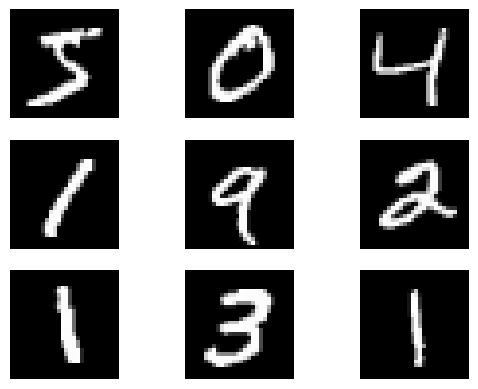

In [5]:
import matplotlib.pyplot as plt

# Display a few images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [6]:
#Now normalize for improved training
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0


In [7]:
#CNNs expect a 4D input: (samples, height, width, channels). Since MNIST images are grayscale, the number of channels is 1.
# Reshape to add a channel dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [8]:
#we one hot encode to convert the classes to catgories 
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [9]:
#split the images into training and testing set 
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [10]:
#build CNN model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use sparse_categorical_crossentropy as labels are integers
    metrics=['accuracy']
)

# Summary of the model
model.summary()


C:\Users\Owner\ML\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Reshape the data to add a channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)  # Add channel for grayscale images
X_val = X_val.reshape(-1, 28, 28, 1)      # Validation data
X_test = X_test.reshape(-1, 28, 28, 1)    # Test data

# Train the CNN model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8524 - loss: 0.4642 - val_accuracy: 0.9820 - val_loss: 0.0559
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9746 - loss: 0.0843 - val_accuracy: 0.9870 - val_loss: 0.0460
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9809 - loss: 0.0641 - val_accuracy: 0.9898 - val_loss: 0.0365
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9854 - loss: 0.0491 - val_accuracy: 0.9886 - val_loss: 0.0365
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9885 - loss: 0.0377 - val_accuracy: 0.9892 - val_loss: 0.0379
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9893 - val_loss: 0.0396
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9906 - loss: 0.0281 - val_accuracy: 0.9900 - val_loss: 0.0323
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9918 -

In [25]:
#Evaluate model 
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9916 - loss: 0.0273
Test Accuracy: 0.9934


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


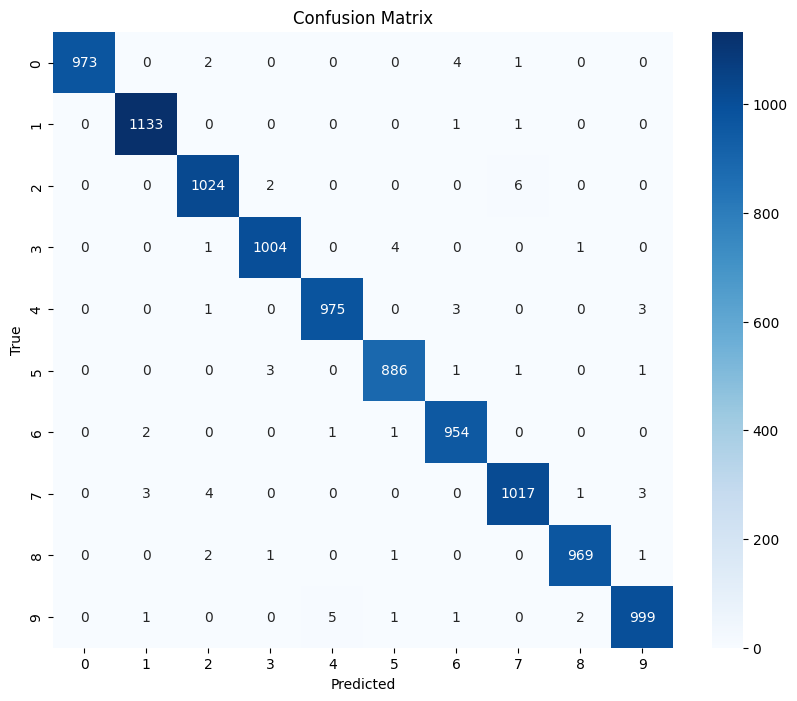

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      1.00      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure true labels are in integer format
y_test_integers = np.argmax(y_test, axis=1)

# Predict and get class indices
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_integers, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test_integers, y_pred_classes))


Conclusion
The CNN model for handwritten digit recognition was trained and evaluated on the MNIST dataset, achieving remarkable performance metrics:

Accuracy: The model attained an overall accuracy of 99%, demonstrating its capability to correctly classify the majority of test samples.

Class-Specific Performance:

All classes achieved a precision, recall, and F1-score of 0.99 or higher, indicating excellent performance across all digit categories (0–9).
The highest-performing classes showed near-perfect precision and recall, reflecting minimal false positives and false negatives.
Macro and Weighted Averages:

Both macro and weighted averages for precision, recall, and F1-score are 0.99, confirming balanced performance across all classes regardless of class size.
Support: Each class's results are based on ample test samples (ranging from 892 to 1135 per class), making the metrics statistically robust.

Overall, the model has successfully met the project's goals, making it a strong candidate for deployment in real-world applications like automated form processing or digit recognition systems.










In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an augmented data generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the generator on the training data
datagen.fit(X_train)

# Retrain the model with augmented data
history_augmented = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=10
)


Epoch 1/10


C:\Users\Owner\ML\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9421 - loss: 0.1974 - val_accuracy: 0.9897 - val_loss: 0.0348
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9689 - loss: 0.1064 - val_accuracy: 0.9908 - val_loss: 0.0304
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9745 - loss: 0.0871 - val_accuracy: 0.9933 - val_loss: 0.0282
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9772 - loss: 0.0784 - val_accuracy: 0.9918 - val_loss: 0.0273
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9773 - loss: 0.0746 - val_accuracy: 0.9922 - val_loss: 0.0294
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9799 - loss: 0.0687 - val_accuracy: 0.9931 - val_loss: 0.0253
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9816 - loss: 0.0654 - val_accuracy: 0.9922 - val_loss: 0.0283
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9822 - loss: 0.06

In [22]:
predictions = model.predict(X_test)
predictions_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_classes = np.argmax(y_test, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, predictions_classes))

print("\nClassification Report:")
print(classification_report(y_test_classes, predictions_classes))


Confusion Matrix:
[[ 976    0    0    0    0    0    3    1    0    0]
 [   0 1128    1    2    0    0    1    3    0    0]
 [   1    0 1027    2    0    0    1    1    0    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   0    0    0    6    0  883    1    0    1    1]
 [   0    2    0    0    0    3  953    0    0    0]
 [   0    1    3    1    2    1    0 1019    1    0]
 [   0    0    1    2    0    0    0    0  971    0]
 [   0    0    0    1    6    4    0    1    8  989]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99     

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9916 - loss: 0.0273
Test Accuracy: 0.9934


Conclusion
After implementing data augmentation techniques, including random rotations, zooming, and horizontal flips, the CNN model's accuracy on the test set remained consistent at 99%. While test accuracy remained unchanged, data augmentation may still improve generalization to unseen data, even though this is not directly reflected in the test accuracy.